In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv("/content/trainset.csv")
df_train.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


In [ ]:
df_test = pd.read_csv("/content/testset.csv")
df_test.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.5,yes
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.5,yes
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.5,yes
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.5,yes
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.5,yes


In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


In [ ]:
df.shape

(41188, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   housing      41188 non-null  object 
 5   loan         41188 non-null  object 
 6   contact      41188 non-null  object 
 7   month        41188 non-null  object 
 8   day_of_week  41188 non-null  object 
 9   duration     41188 non-null  int64  
 10  campaign     41188 non-null  int64  
 11  pdays        41188 non-null  int64  
 12  poutcome     41188 non-null  object 
 13  nr.employed  41188 non-null  float64
 14  Subscribed   41188 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
duration,0


In [ ]:
df.drop(columns=['month', 'day_of_week', 'nr.employed', 'duration'], inplace=True)

In [ ]:
df['pdays'] = df['pdays'].replace(999, -1)

In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,campaign,pdays,poutcome,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,1,-1,nonexistent,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,1,-1,nonexistent,yes
2,49,technician,married,basic.9y,no,no,telephone,1,-1,nonexistent,yes
3,41,technician,married,professional.course,yes,no,telephone,1,-1,nonexistent,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,1,-1,nonexistent,yes


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'job': ['blue-collar' 'entrepreneur' 'technician' 'housemaid' 'unknown'
 'services' 'management' 'admin.' 'student' 'unemployed' 'self-employed'
 'retired']
Unique values in 'marital': ['divorced' 'married' 'single' 'unknown']
Unique values in 'education': ['basic.4y' 'university.degree' 'basic.9y' 'professional.course' 'unknown'
 'high.school' 'basic.6y' 'illiterate']
Unique values in 'housing': ['yes' 'no' 'unknown']
Unique values in 'loan': ['no' 'yes' 'unknown']
Unique values in 'contact': ['telephone' 'cellular']
Unique values in 'poutcome': ['nonexistent' 'failure' 'success']
Unique values in 'Subscribed': ['yes' 'no']


In [ ]:
# df = df.replace('unknown', pd.NA)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
housing,0
loan,0
contact,0
campaign,0
pdays,0
poutcome,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,campaign,pdays,poutcome,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,1,-1,nonexistent,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,1,-1,nonexistent,yes
2,49,technician,married,basic.9y,no,no,telephone,1,-1,nonexistent,yes
3,41,technician,married,professional.course,yes,no,telephone,1,-1,nonexistent,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,1,-1,nonexistent,yes


In [ ]:
df.shape

(41188, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

for col, encoder in encoders.items():
    print(f"Classes for {col}: {encoder.classes_}")

Classes for job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Classes for marital: ['divorced' 'married' 'single' 'unknown']
Classes for education: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
Classes for housing: ['no' 'unknown' 'yes']
Classes for loan: ['no' 'unknown' 'yes']
Classes for contact: ['cellular' 'telephone']
Classes for poutcome: ['failure' 'nonexistent' 'success']
Classes for Subscribed: ['no' 'yes']


In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,campaign,pdays,poutcome,Subscribed
0,41,1,0,0,2,0,1,1,-1,1,1
1,49,2,1,6,2,0,1,1,-1,1,1
2,49,9,1,2,0,0,1,1,-1,1,1
3,41,9,1,5,2,0,1,1,-1,1,1
4,45,1,1,2,2,0,1,1,-1,1,1


In [ ]:
subscribed_counts = df['Subscribed'].value_counts()

subscribed_counts

,count
Subscribed,
0,36548
1,4640


In [ ]:
X = df.drop(columns=['Subscribed'])
y = df['Subscribed']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=df.columns.drop("Subscribed"))
print(feature_importances.sort_values(ascending=False))

age          0.383727
job          0.122519
campaign     0.115210
education    0.089591
pdays        0.087231
poutcome     0.074372
housing      0.039415
marital      0.039098
loan         0.029541
contact      0.019295
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=0)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow.keras.backend as K

def focal_loss(alpha=0.5, gamma=2.0):
    def loss(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_term = K.pow((1 - p_t), gamma)
        return alpha * focal_term * bce
    return loss

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss=focal_loss(), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/50
3582/3582 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6041 - loss: 0.0964 - val_accuracy: 0.7061 - val_loss: 0.0759
Epoch 2/50
3582/3582 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6497 - loss: 0.0772 - val_accuracy: 0.7160 - val_loss: 0.0732
Epoch 3/50
3582/3582 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6553 - loss: 0.0770 - val_accuracy: 0.7037 - val_loss: 0.0741
Epoch 4/50
3582/3582 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6585 - loss: 0.0767 - val_accuracy: 0.6934 - val_loss: 0.0753
Epoch 5/50
3582/3582 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6596 - loss: 0.0764 - val_accuracy: 0.7465 - val_loss: 0.0718
Epoch 6/50
3582/3582 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6584 - loss: 0.0763 - val_accuracy: 0.6814 - val_loss: 0.0765
Epoch 7/50
3582/3582 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6598 - loss: 0.0762 - val_accuracy: 0.6884 - val_loss: 0.0756
Epoch 8/50
3582/3582 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6640 - loss: 0

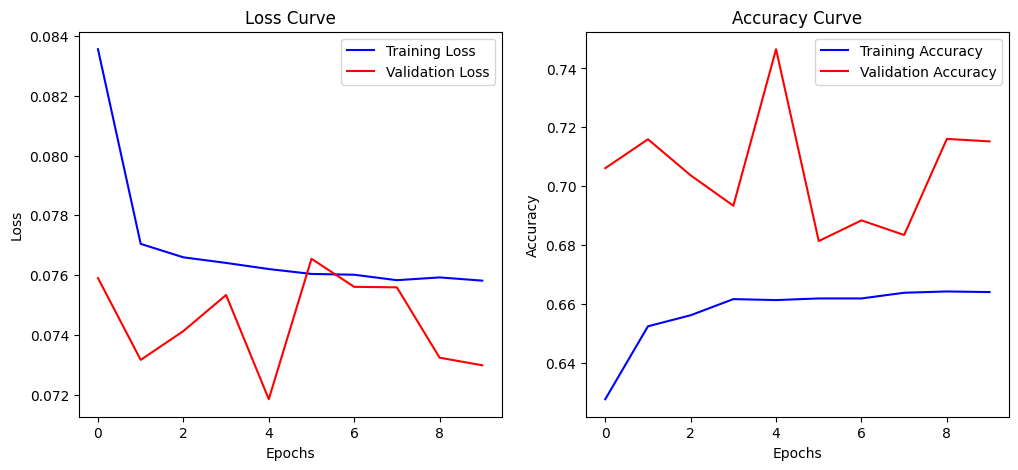

In [ ]:
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_acc:.4f}")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7446 - loss: 0.0722
Test Accuracy: 0.7465


In [ ]:
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.84      7294
           1       0.23      0.52      0.32       944

    accuracy                           0.75      8238
   macro avg       0.58      0.65      0.58      8238
weighted avg       0.85      0.75      0.78      8238



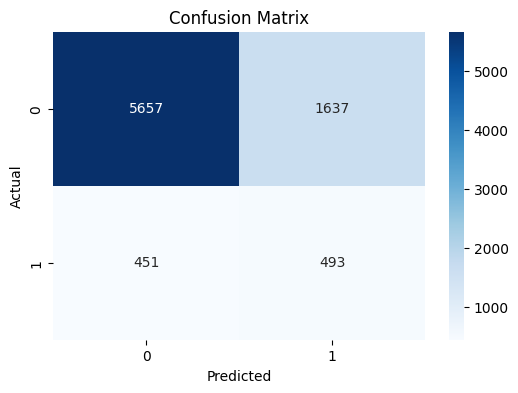

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

With Focal Loss, smote tomek and no dropping (good Results)